In [1]:
from results_utils import *
import itertools

temp = [1.0, 0.2]
reasoning = [False]
entailment = [Entail.GPT, Entail.ONESHOT]
checker = [Entail.GPT]

combinations = list(itertools.product(temp, reasoning, entailment, checker))
combinations  = [Result(temp=c[0], reasoning=c[1], entailment=c[2], checker=c[3]) for c in combinations]

results = Results(combinations, dataset_path="/home/jahanpd/filtered.csv")

./data/openai_gpt_oneshot=False_temp=1.0_reas=False_agg=original_confidence.pkl
./data/openai_gpt_oneshot=False_temp=1.0_reas=False_checker=gpt_correctness.pkl
./data/openai_temp=1.0_reasoning=False_generations.pkl


/home/jahanpd/envs/llm/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


failed to load client
7.0 51.9017365269461 114.4
./data/openai_gpt_oneshot=True_temp=1.0_reas=False_agg=original_confidence.pkl
./data/openai_gpt_oneshot=True_temp=1.0_reas=False_checker=gpt_correctness.pkl
./data/openai_temp=1.0_reasoning=False_generations.pkl
7.0 51.9017365269461 114.4
./data/openai_gpt_oneshot=False_temp=0.2_reas=False_agg=original_confidence.pkl
./data/openai_gpt_oneshot=False_temp=0.2_reas=False_checker=gpt_correctness.pkl
./data/openai_temp=0.2_reasoning=False_generations.pkl
4.0 50.03041916167665 119.9
./data/openai_gpt_oneshot=True_temp=0.2_reas=False_agg=original_confidence.pkl
./data/openai_gpt_oneshot=True_temp=0.2_reas=False_checker=gpt_correctness.pkl
./data/openai_temp=0.2_reasoning=False_generations.pkl
4.0 50.03041916167665 119.9
[1080, 1080, 1081, 1081]
[590, 590, 589, 589]


In [2]:
df = results.get_results_df()

In [3]:
format_str = lambda metric, lb, ub: f"{metric:.2f} ({lb:.2f} - {ub:.2f})"
df["acc_fmt"] = [format_str(m, l, u) for m, l, u in zip(df.acc, df.acc_ci_l, df.acc_ci_u)]
df["auc_fmt"] = [format_str(m, l, u) for m, l, u in zip(df.auc, df.auc_ci_l, df.auc_ci_u)]


In [7]:
df.to_csv("results.csv")

In [7]:
# the base performance
df[
   (df.part == 'full') &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   (df.entailment == Entail.GPT) &
   (df.temp == 1.0)
   ][["metric", "acc_fmt", "auc_fmt"]].to_latex()

'\\begin{tabular}{llll}\n\\toprule\n & metric & acc_fmt & auc_fmt \\\\\n\\midrule\n3 & entropy & 0.50 (0.50 - 0.50) & 0.76 (0.73 - 0.78) \\\\\n45 & dentropy & 0.50 (0.50 - 0.50) & 0.75 (0.73 - 0.78) \\\\\n84 & perplexity & 0.51 (0.51 - 0.51) & 0.62 (0.60 - 0.65) \\\\\n\\bottomrule\n\\end{tabular}\n'

Sequence length in the response is interesting to compare because shorter sequences have a fewer ways of expressing ideas.

In the simplest case of a one word answer, a different word will convey a different meaning - so perplexity should be tightly correlated with correctness.

As a sequence gets longer, there are more ways to say the same thing and perplexity begins to lose correlation with correctness.

Prediction: perplexity in short sequences should perform well compared to SE

In [13]:
# The effect of response length
df[
   ((df.part == 'short') |
   (df.part == 'long')) &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   ((df.metric == 'entropy') |
   (df.metric == 'perplexity')) &
   # (df.entailment == Entail.GPT) &
   (df.temp == 1.0)
   ].sort_values('part')

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
39,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,long,0.364769,0.733552
120,1.0,False,Entail.GPT,Entail.GPT,perplexity,perplexity_correct,long,0.384342,0.635691
165,1.0,False,Entail.ONESHOT,Entail.GPT,entropy,cluster_correct_lowest,long,0.359431,0.688999
246,1.0,False,Entail.ONESHOT,Entail.GPT,perplexity,perplexity_correct,long,0.396797,0.626877
33,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,short,0.878788,0.879310
114,1.0,False,Entail.GPT,Entail.GPT,perplexity,perplexity_correct,short,0.818182,0.820988
159,1.0,False,Entail.ONESHOT,Entail.GPT,entropy,cluster_correct_lowest,short,0.787879,0.917582
240,1.0,False,Entail.ONESHOT,Entail.GPT,perplexity,perplexity_correct,short,0.848485,0.842857


In [15]:
import pickle
confidence = pickle.load(open("./data/openai_gpt_oneshot=False_temp=1.0_reas=False_agg=original_confidence.pkl", 'rb'))
confidence2 = pickle.load(open("./data/openai_gpt_oneshot=True_1.0_reas=False_agg=original_confidence.pkl", 'rb'))
correctness = pickle.load(open("./data/openai_gpt_oneshot=False_temp=1.0_reas=False_checker=gpt_correctness.pkl", 'rb'))
correctness2 = pickle.load(open("./data/openai_gpt_oneshot=True=1.0_reas=False_checker=gpt_correctness.pkl", 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: './data/openai_gpt_oneshot=True=1.0_reas=False_agg=original_confidence.pkl'

In [ ]:
correctness

In [5]:
# The effect of response length
df[
   ((df.part == 'short') |
   (df.part == 'long')) &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   ((df.metric == 'entropy') |
   (df.metric == 'perplexity')) &
   (df.temp == 1.0) &
   (df.entailment == Entail.GPT)
   ].sort_values('part')

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
39,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,long,0.364769,0.733552
120,1.0,False,Entail.GPT,Entail.GPT,perplexity,perplexity_correct,long,0.384342,0.635691
33,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,short,0.878788,0.879310
114,1.0,False,Entail.GPT,Entail.GPT,perplexity,perplexity_correct,short,0.818182,0.820988


In [6]:
# The effect of entailment strategy
df[
   (df.part == 'full') &
   (df.metric == 'entropy') &
   (df.temp == 1.0) &
   (df.correctness == 'cluster_correct_lowest')
   ]

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
3,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,full,0.499401,0.757508
129,1.0,False,Entail.ONESHOT,Entail.GPT,entropy,cluster_correct_lowest,full,0.477844,0.726257


In [7]:
# The effect of correctness definition
df[
   (df.part == 'full') &
   (df.metric == 'entropy') &
   (df.temp == 1.0) &
   (df.entailment == Entail.GPT)
   ].sort_values('part')

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
0,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_strict,full,0.410778,0.783265
1,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_relaxed,full,0.562275,0.743190
2,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_majority,full,0.491617,0.763558
3,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,full,0.499401,0.757508
4,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_oneshot_all,full,0.402395,0.835044
5,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_oneshot_most,full,0.635928,0.717678


In [14]:
# The effect of temperature
df[
   (df.part == 'full') &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   (df.entailment == Entail.GPT)
   ].sort_values('temp')[["temp", "metric", "acc_fmt", "auc_fmt"]].to_latex(index_names=False)

'\\begin{tabular}{lrlll}\n\\toprule\n & temp & metric & acc_fmt & auc_fmt \\\\\n\\midrule\n185 & 0.200000 & entropy & 0.51 (0.51 - 0.51) & 0.71 (0.68 - 0.73) \\\\\n227 & 0.200000 & dentropy & 0.51 (0.51 - 0.51) & 0.67 (0.65 - 0.70) \\\\\n266 & 0.200000 & perplexity & 0.52 (0.52 - 0.52) & 0.58 (0.55 - 0.61) \\\\\n3 & 1.000000 & entropy & 0.50 (0.50 - 0.50) & 0.76 (0.73 - 0.78) \\\\\n84 & 1.000000 & perplexity & 0.51 (0.51 - 0.51) & 0.62 (0.60 - 0.65) \\\\\n45 & 1.000000 & dentropy & 0.50 (0.50 - 0.50) & 0.75 (0.73 - 0.78) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [19]:
# The effect of reasoning
df[
   (df.temp == 1.0) &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   (df.entailment == Entail.GPT) &
   ((df.part == 'reasoning') | 
    (df.part == 'knowledge'))
   ].sort_values('metric')[["metric", "part", "acc_fmt", "auc_fmt"]].to_latex(index_names=False)

'\\begin{tabular}{lllll}\n\\toprule\n & metric & part & acc_fmt & auc_fmt \\\\\n\\midrule\n63 & dentropy & knowledge & 0.56 (0.56 - 0.56) & 0.74 (0.71 - 0.76) \\\\\n69 & dentropy & reasoning & 0.39 (0.39 - 0.39) & 0.76 (0.72 - 0.80) \\\\\n21 & entropy & knowledge & 0.56 (0.56 - 0.56) & 0.74 (0.72 - 0.77) \\\\\n27 & entropy & reasoning & 0.39 (0.39 - 0.39) & 0.77 (0.73 - 0.81) \\\\\n87 & perplexity & knowledge & 0.58 (0.57 - 0.58) & 0.67 (0.64 - 0.70) \\\\\n88 & perplexity & reasoning & 0.38 (0.38 - 0.38) & 0.66 (0.61 - 0.70) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [20]:
# The effect of part
df[
   (df.temp == 1.0) &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   (df.entailment == Entail.GPT) &
   ((df.part == 'part1') | 
    (df.part == 'part2'))
   ].sort_values('metric')[["metric", "part", "acc_fmt", "auc_fmt"]].to_latex(index_names=False)

'\\begin{tabular}{lllll}\n\\toprule\n & metric & part & acc_fmt & auc_fmt \\\\\n\\midrule\n51 & dentropy & part1 & 0.58 (0.57 - 0.58) & 0.75 (0.72 - 0.79) \\\\\n57 & dentropy & part2 & 0.43 (0.43 - 0.43) & 0.73 (0.70 - 0.77) \\\\\n9 & entropy & part1 & 0.58 (0.58 - 0.58) & 0.77 (0.73 - 0.80) \\\\\n15 & entropy & part2 & 0.43 (0.43 - 0.43) & 0.73 (0.70 - 0.76) \\\\\n85 & perplexity & part1 & 0.60 (0.60 - 0.60) & 0.66 (0.62 - 0.70) \\\\\n86 & perplexity & part2 & 0.42 (0.42 - 0.43) & 0.59 (0.55 - 0.63) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [21]:
# The effect of length
df[
   (df.temp == 1.0) &
   ((df.correctness == "cluster_correct_lowest") |
   (df.correctness == "perplexity_correct")) &
   (df.entailment == Entail.GPT) &
   ((df.part == 'short') | 
    (df.part == 'long'))
   ].sort_values('metric')[["metric", "part", "acc_fmt", "auc_fmt"]].to_latex(index_names=False)

'\\begin{tabular}{lllll}\n\\toprule\n & metric & part & acc_fmt & auc_fmt \\\\\n\\midrule\n75 & dentropy & short & 0.88 (0.88 - 0.88) & 0.79 (0.59 - 0.99) \\\\\n81 & dentropy & long & 0.36 (0.36 - 0.37) & 0.73 (0.68 - 0.77) \\\\\n33 & entropy & short & 0.88 (0.87 - 0.88) & 0.88 (0.74 - 1.00) \\\\\n39 & entropy & long & 0.36 (0.36 - 0.37) & 0.73 (0.69 - 0.78) \\\\\n89 & perplexity & short & 0.82 (0.81 - 0.82) & 0.82 (0.66 - 0.98) \\\\\n90 & perplexity & long & 0.38 (0.38 - 0.39) & 0.64 (0.59 - 0.68) \\\\\n\\bottomrule\n\\end{tabular}\n'

In [10]:
# The effect of reasoning
df[
#    (df.entailment == Entail.GPT) &
   (df.metric == 'entropy') &
   (df.temp == 1.0) &
   (df.correctness == 'cluster_correct_lowest') &
   ((df.part == 'reasoning') | 
    (df.part == 'knowledge'))
   ].sort_values('part')

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
21,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,knowledge,0.553268,0.724841
147,1.0,False,Entail.ONESHOT,Entail.GPT,entropy,cluster_correct_lowest,knowledge,0.525515,0.693411
27,1.0,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_lowest,reasoning,0.402458,0.753557
153,1.0,False,Entail.ONESHOT,Entail.GPT,entropy,cluster_correct_lowest,reasoning,0.385561,0.735279


In [7]:
# The effect of temperature
df[(df.entailment == Entail.GPT) &
   # (df.metric == 'entropy') &
   (df.part == 'full') &
   (df.reasoning == False)
   ].sort_values('temp')

,temp,reasoning,entailment,checker,metric,correctness,part,acc,auc
128,0.2,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_majority,full,0.472851,0.684904
126,0.2,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_strict,full,0.403281,0.709112
127,0.2,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_relaxed,full,0.550905,0.650277
169,0.2,False,Entail.GPT,Entail.GPT,dentropy,cluster_correct_relaxed,full,0.550905,0.650991
168,0.2,False,Entail.GPT,Entail.GPT,dentropy,cluster_correct_strict,full,0.403281,0.700013
131,0.2,False,Entail.GPT,Entail.GPT,entropy,cluster_correct_oneshot_most,full,0.606900,0.648893
210,0.2,False,Entail.GPT,Entail.GPT,perplexity,perplexity_correct,full,0.502828,0.579883
173,0.2,False,Entail.GPT,Entail.GPT,dentropy,cluster_correct_oneshot_most,full,0.606900,0.654108
172,0.2,False,Entail.GPT,Entail.GPT,dentropy,cluster_correct_oneshot_all,full,0.476810,0.720478
171,0.2,False,Entail.GPT,Entail.GPT,dentropy,cluster_correct_lowest,full,0.478507,0.672921


In [8]:
# The effect of correctness
df[(df.entailment == Entail.DEBERTA) &
   (df.metric == 'entropy') &
   (df.part == 'full') &
   (df.reasoning == False) &
   (df.temp == 1.0)
   ].sort_values('correctness')

In [13]:
# The effect of reasoning across parts
df[(df.entailment == Entail.GPT) &
   (df.metric == 'entropy') &
   (df.temp == 1.1) &
   (df.correctness == "cluster_correct_strict")
   ].sort_values('part')

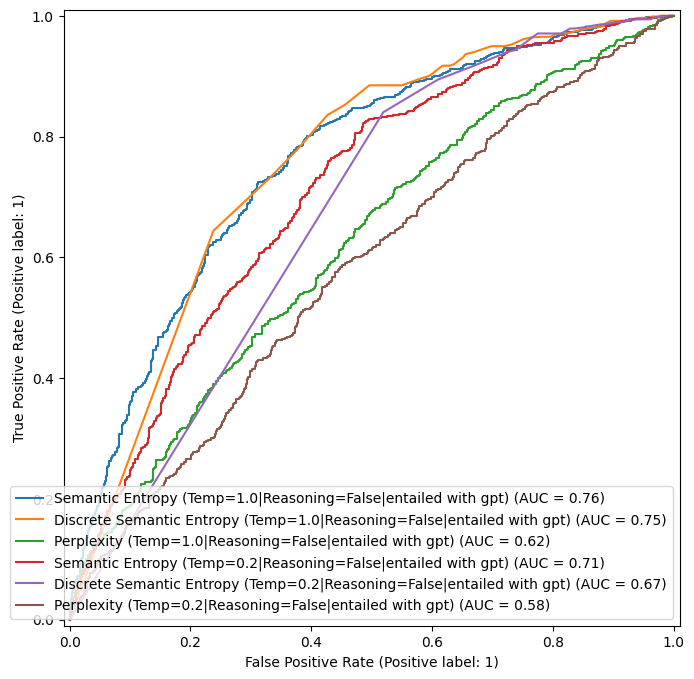

In [2]:
results.plot_aurocs_sem_ent_full_gpt()

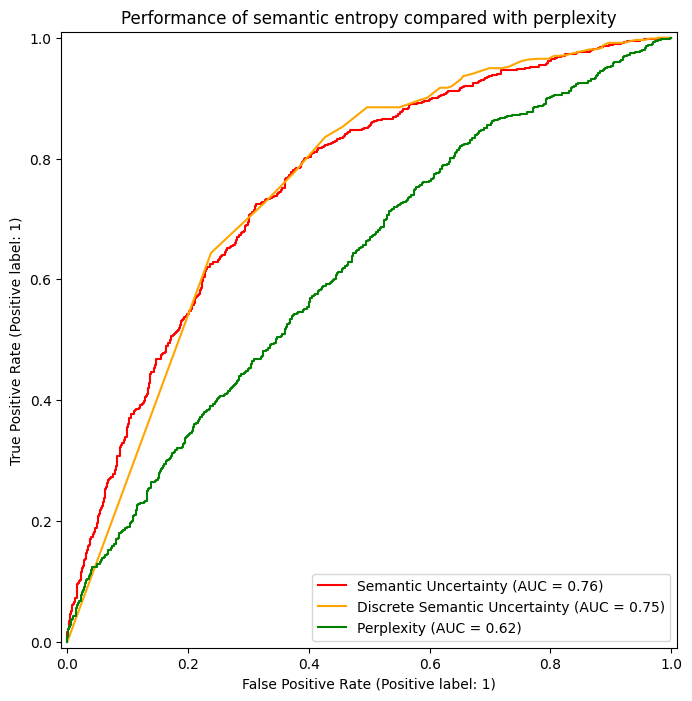

In [3]:
# temp 1 | entailment GPT | no reasoning
results.plot_aurocs_metrics_standard("Performance of semantic entropy compared with perplexity")

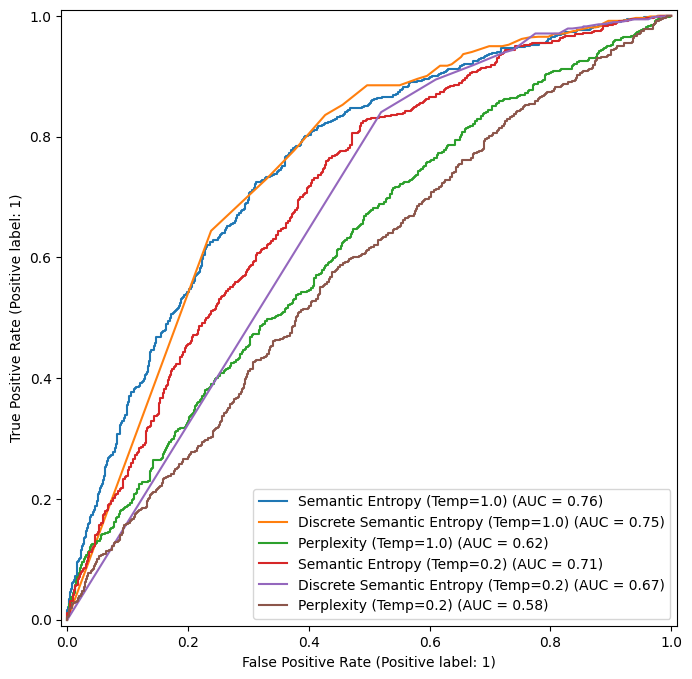

In [4]:
results.plot_aurocs_temp()

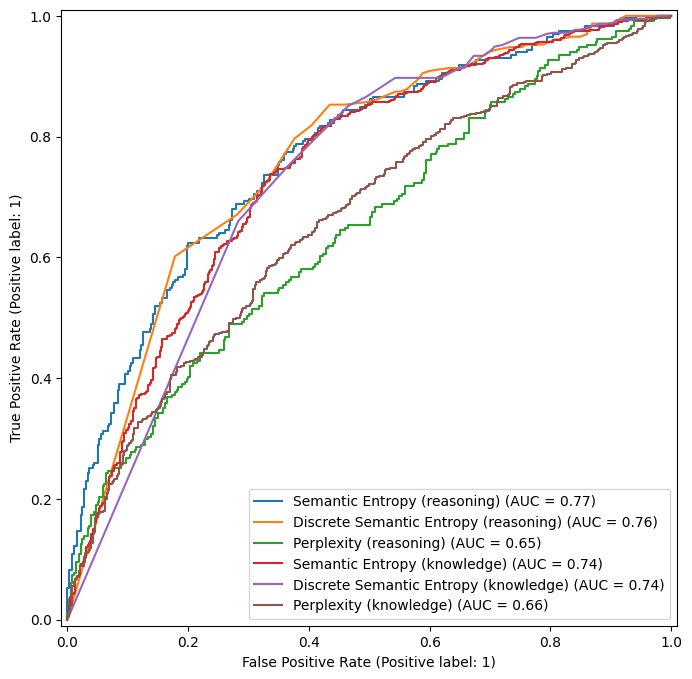

In [5]:
results.plot_aurocs_category()

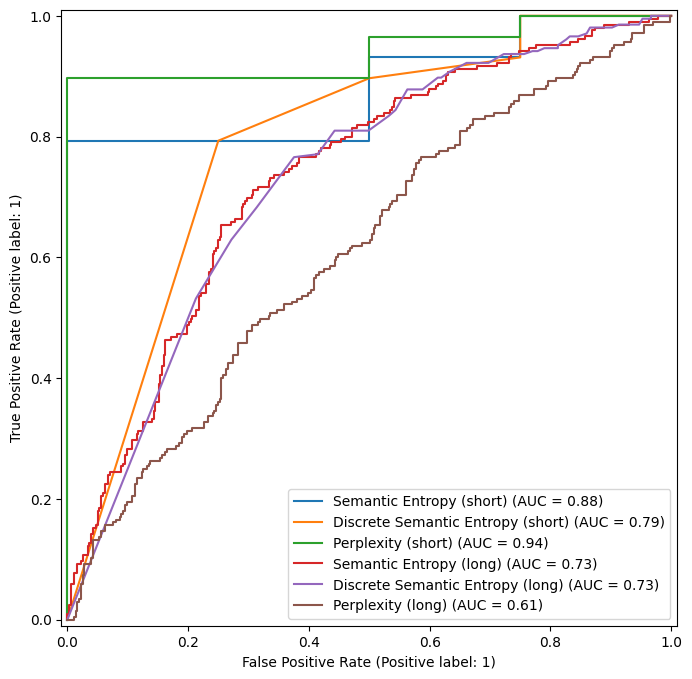

In [6]:
results.plot_aurocs_length()